In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
%matplotlib inline

C:\Users\Vanya\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


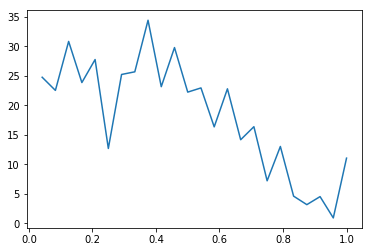

In [2]:
series = [24.78, 22.55, 30.85, 23.88,
       27.78, 12.71, 25.25, 25.70, 
       34.44, 23.18, 29.81, 22.26, 
       22.97, 16.37, 22.82, 14.19, 
       16.40, 7.23, 13.05, 4.63, 
       3.19, 4.55, 0.94, 11.07]

time = [(x + 1) / len(series) for x in range(len(series))]

time_np = np.array(time)
series_np = np.array(series)

plt.plot(time,series)

4) Рассчитать регрессионную модель тренда первого порядка, то есть
линейный тренд

5) Сначала произвести оценку регрессионной модели
Для этого потребуется в матричном виде решить эту систему
линейных уравнений.

6) Для линейного тренда

7) Для решения Вам пригодится функция:

8) Из этого результата B коэффициенты находятся в нулевом элементе.
Построим получившийся тренд:

In [3]:
time_stacked = np.vstack((np.ones(len(time)), time)).T
B = np.linalg.lstsq(time_stacked,series)
B = B[0] 

[ 31.5565942  -25.34066087]


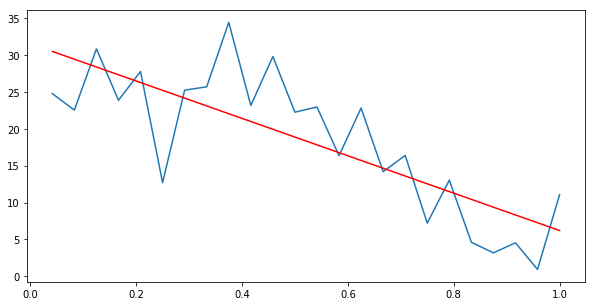

In [186]:
print(B)
plt.figure(figsize = (10, 5))
plt.plot(time,series) # строим исходный ВР
plt.plot(time, B[0] + np.multiply(B[1], time), 'r') # строим его тренд
plt.show()

9) Кроме матричных расчетов в Python, несомненно, существуют и
готовые функции построения регрессионных кривых. Воспользуемся
ими из нескольких библиотек.

10) На основе построения полиномиальных кривых из numpy:

[-25.34066087  31.5565942 ]


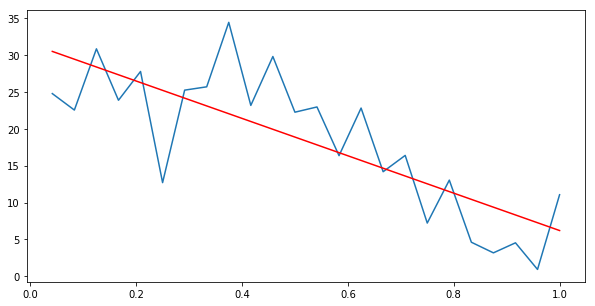

In [139]:
bb = np.polyfit(time, series, 1) # полиномиальная кривая 1-го порядка
print(bb)
plt.figure(figsize = (10, 5))
plt.plot(time, series)
plt.plot(time, bb[1] + np.multiply(bb[0],time) , 'r') # Внимание! Коэф. β в другом порядке
plt.show()

Чтобы не ошибиться в порядке коэффициентов, лучше использовать
функцию poly1d:


 
-25.34 x + 31.56


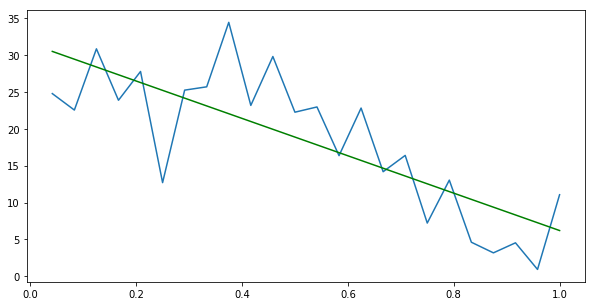

In [140]:
p = np.poly1d(bb) # создаем экземпляр полинома
print(p)
plt.figure(figsize = (10, 5))
plt.plot(time, series)
# считаем значения полинома на заданной временной сетке
plt.plot(time, p(time), 'g')
plt.show()

12) На основе подгонки кривых curve_fit из scipy.optimize:

[ 31.55659417 -25.3406608 ]
[[ 6.43696373 -9.45839567]
 [-9.45839567 18.16011967]]


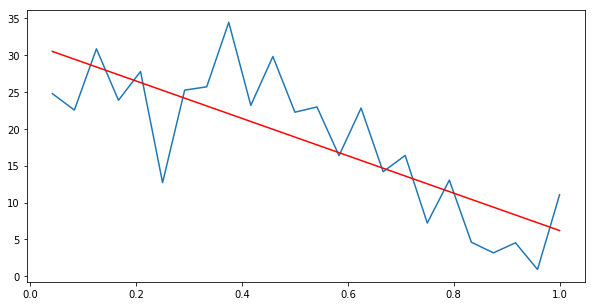

In [141]:
from scipy.optimize import curve_fit

def func(t, b0, b1): # описываем функцию тренда
    return b0 + b1 * t # линейный тренд с 2 параметрами

popt, pcov = curve_fit(func, time, series) # проводим подгонку МНК
print(popt) # получаем коэффициенты b0 & b1
print(pcov) # ковариационная матрица ошибок подгонки 
plt.figure(figsize = (10, 5))
plt.plot(time,series) # строим исходный ВР
plt.plot(time, popt[0] + np.multiply(popt[1], time), 'r') # строим его тренд
plt.show()

13) На основе библиотеки sklearn:

[-25.34066087]
31.5565942029
0.616460136327


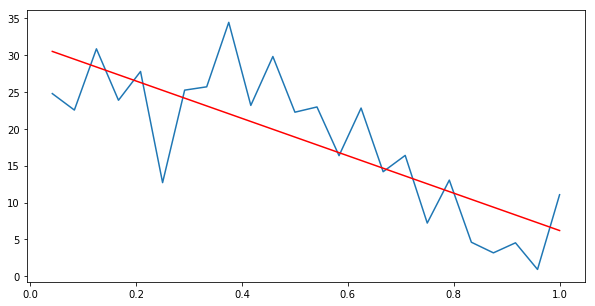

In [11]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(time_np.reshape(-1,1), series_np)
print(reg.coef_) # здесь выведется линейный коэффициент b1
print(reg.intercept_) # здесь выведется коэффициент b0 (смещение)
print(reg.score(time_np.reshape(-1,1), series_np))
# здесь будет выведена «оценка» (равная R^2) полученной регрессии,
#чем ближе она к 1.0, тем лучше тренд
plt.figure(figsize = (10, 5))
plt.plot(time,series) # строим исходный ВР
plt.plot(time, reg.intercept_ + np.multiply(reg.coef_, time), 'r') # строим его тренд
plt.show()

14) На основе statsmodel:

[ 31.5565942  -25.34066087]


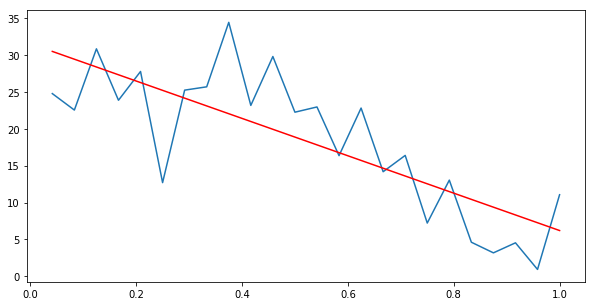

In [143]:
import statsmodels.api as sm

x_ = sm.add_constant(time_np.reshape(-1,1)) # создаем простую модель
smm = sm.OLS(series_np, x_) # используем Метод Наименьших Квадратов
# (МНК) (Ordinary Least Squares = OLS)
res = smm.fit() # подгоняем параметры модели по МНК
print(res.params) # получаем результирующие коэффициенты
plt.figure(figsize = (10, 5))
plt.plot(time,series) # строим исходный ВР
plt.plot(time, res.params[0] + np.multiply(res.params[1], time), 'r') # строим его тренд
plt.show()

15) Пример, приведенный выше, гораздо ближе по своей реализации
уже к методам машинного обучения: сначала задается «форма»
решаемой задачи, затем определяется метод ее решения и уже самим
решением занимается ЭВМ.

16) Удостоверьтесь, что во всех реализациях получились одинаковые
коэффициенты линейного тренда

#### Были получены одинаковые коэффициенты

17) Аналогичным образом постройте модель тренда второй и
третьей степени. 
Учтите, что не все приведенные выше методы
для этого подойдут.

## 2 степень

[ 24.42815217  14.13994114 -37.90137793]


C:\Users\student\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


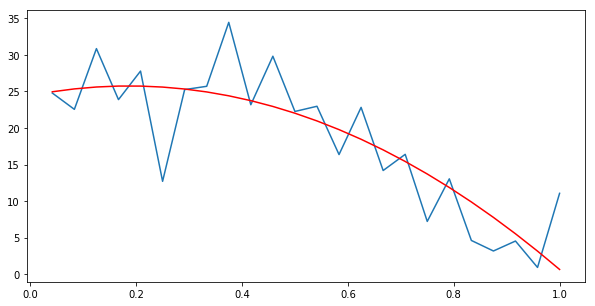

In [188]:
time_stacked_2 = np.vstack((np.vstack((np.ones(len(time)), time)),np.square(time))).T
B2 = np.linalg.lstsq(time_stacked_2,series)
B2 = B2[0] 
print(B2)
plt.figure(figsize = (10, 5))
plt.plot(time,series) # строим исходный ВР
plt.plot(time, B2[0] + np.multiply(B2[1], time) + np.multiply(B2[2], np.square(time)), 'r') # строим его тренд
plt.show()

[ 24.4281527   14.13993836 -37.90137537]
[[  12.88378934  -50.4484016    41.18236928]
 [ -50.4484016   252.0867866  -228.08697103]
 [  41.18236928 -228.08697103  218.96349323]]


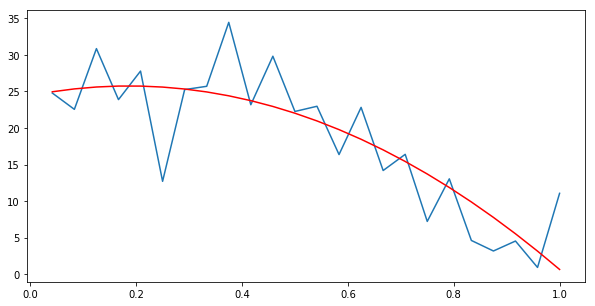

In [162]:
def func2(t, b0, b1, b2): # описываем функцию тренда
    return b0 + b1 * t + b2 * np.square(t) # линейный тренд с 2 параметрами

popt, pcov = curve_fit(func2, time, series) # проводим подгонку МНК
print(popt) # получаем коэффициенты b0 & b1
print(pcov) # ковариационная матрица ошибок подгонки 
plt.figure(figsize = (10, 5))
plt.plot(time,series) # строим исходный ВР
plt.plot(time, popt[0] + np.multiply(popt[1], time) + np.multiply(popt[2], np.square(time)), 'r') # строим его тренд
plt.show()

[-37.90137793  14.13994114  24.42815217]


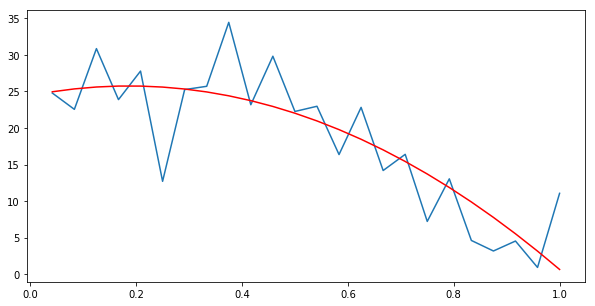

In [166]:
bb = np.polyfit(time, series, 2) # полиномиальная кривая 2-го порядка
print(bb)
plt.figure(figsize = (10, 5))
plt.plot(time, series)
plt.plot(time, bb[2] + np.multiply(bb[1], time) \
         + np.multiply(bb[0], np.square(time)), 'r') # Внимание! Коэф. β в другом порядке
plt.show()

[  0.          14.13994114 -37.90137793]
24.4281521739
0.707758166877


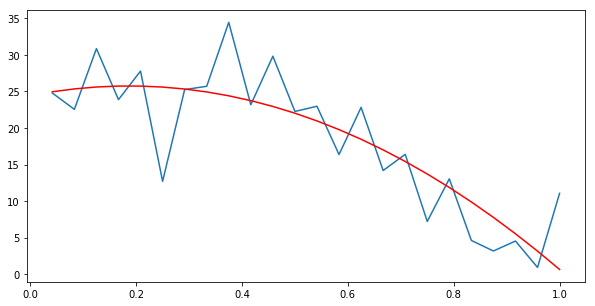

In [17]:
reg = LinearRegression().fit(time_stacked_2, series_np)
print(reg.coef_) # здесь выведется линейный коэффициент b1
print(reg.intercept_) # здесь выведется коэффициент b0 (смещение)
print(reg.score(time_stacked_2, series_np))
# здесь будет выведена «оценка» (равная R^2) полученной регрессии,
#чем ближе она к 1.0, тем лучше тренд
plt.figure(figsize = (10, 5))
plt.plot(time,series_np) # строим исходный ВР
plt.plot(time, reg.intercept_ + np.multiply(reg.coef_[1], time)\
         + np.multiply(reg.coef_[2], np.square(time)), 'r') # строим его тренд
plt.show()

In [15]:
reg.coef_

array([  0.        ,  14.13994114, -37.90137793])

## 3 степень

[  19.52862319   65.4233529  -158.50516834   77.18642586]


C:\Users\student\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


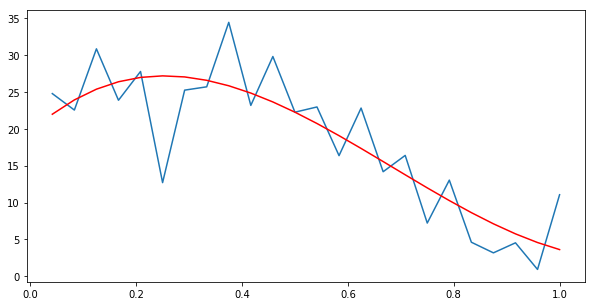

In [189]:
time_stacked_3 = np.vstack((np.vstack((np.vstack((np.ones(len(time)), time)),np.square(time))),np.power(time, 3))).T
B3 = np.linalg.lstsq(time_stacked_3,series)
B3 = B3[0] 
print(B3)
plt.figure(figsize = (10, 5))
plt.plot(time,series) # строим исходный ВР
plt.plot(time, B3[0] + np.multiply(B3[1], time) + np.multiply(B3[2], np.square(time)) + np.multiply(B3[3], np.power(time,3)), 'r') # строим его тренд
plt.show()

[  19.5286239    65.42334611 -158.50515332   77.18641666]
[[   25.85758006  -189.29145056   370.49666405  -211.71237844]
 [ -189.29145056  1715.31761696 -3682.34779474  2215.99527806]
 [  370.49666405 -3682.34779474  8353.84483552 -5211.38167641]
 [ -211.71237844  2215.99527806 -5211.38167641  3335.28427311]]


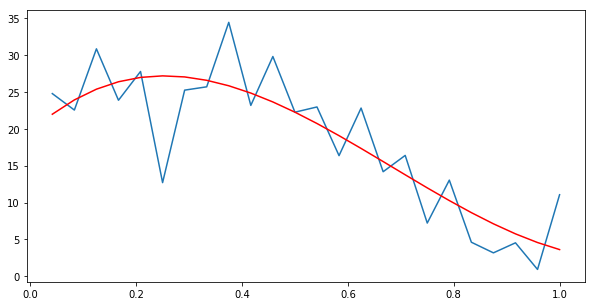

In [171]:
def func3(t, b0, b1, b2, b3): # описываем функцию тренда
    return b0 + b1 * t + b2 * np.square(t) + b3 * np.power(t,3) # линейный тренд с 2 параметрами

popt, pcov = curve_fit(func3, time, series) # проводим подгонку МНК
print(popt) # получаем коэффициенты b0 & b1
print(pcov) # ковариационная матрица ошибок подгонки 
plt.figure(figsize = (10, 5))
plt.plot(time,series) # строим исходный ВР
plt.plot(time, popt[0] + np.multiply(popt[1], time) + np.multiply(popt[2], np.square(time)) + np.multiply(popt[3], np.power(time,3)), 'r') # строим его тренд
plt.show()

[  77.18642586 -158.50516834   65.4233529    19.52862319]


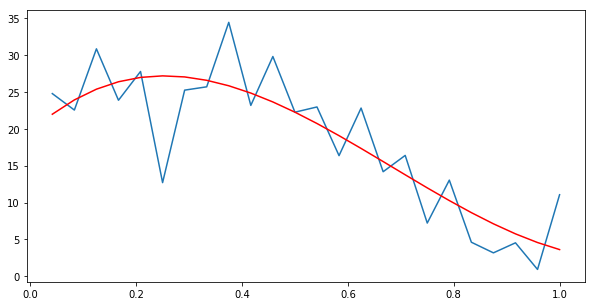

In [172]:
bb = np.polyfit(time, series, 3) # полиномиальная кривая 2-го порядка
print(bb)
plt.figure(figsize = (10, 5))
plt.plot(time, series)
plt.plot(time, bb[3] + np.multiply(bb[2], time) \
         + np.multiply(bb[1], np.square(time))\
         + np.multiply(bb[0], np.power(time,3)), 'r') # Внимание! Коэф. β в другом порядке
plt.show()

[   0.           65.4233529  -158.50516834   77.18642586]
19.528623188405795
0.7317193535409238


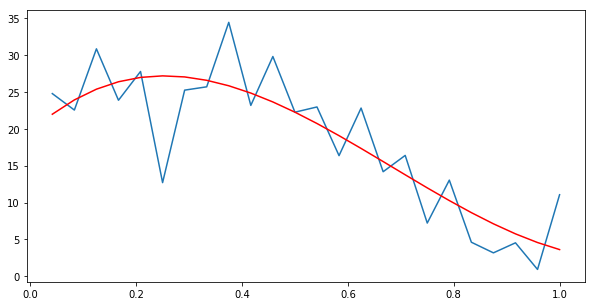

In [182]:
reg = LinearRegression().fit(time_stacked_3, series_np)
print(reg.coef_) # здесь выведется линейный коэффициент b1
print(reg.intercept_) # здесь выведется коэффициент b0 (смещение)
print(reg.score(time_stacked_3, series_np))
# здесь будет выведена «оценка» (равная R^2) полученной регрессии,
#чем ближе она к 1.0, тем лучше тренд
plt.figure(figsize = (10, 5))
plt.plot(time,series) # строим исходный ВР
plt.plot(time, reg.intercept_ + np.multiply(reg.coef_[1], time)\
         + np.multiply(reg.coef_[2], np.square(time))\
         + np.multiply(reg.coef_[3], np.power(time,3)), 'r') 
plt.show()

18) Все найденные тренды разной степени и модели нанесите на
один график. Удостоверьтесь, что получились правильные
результаты.

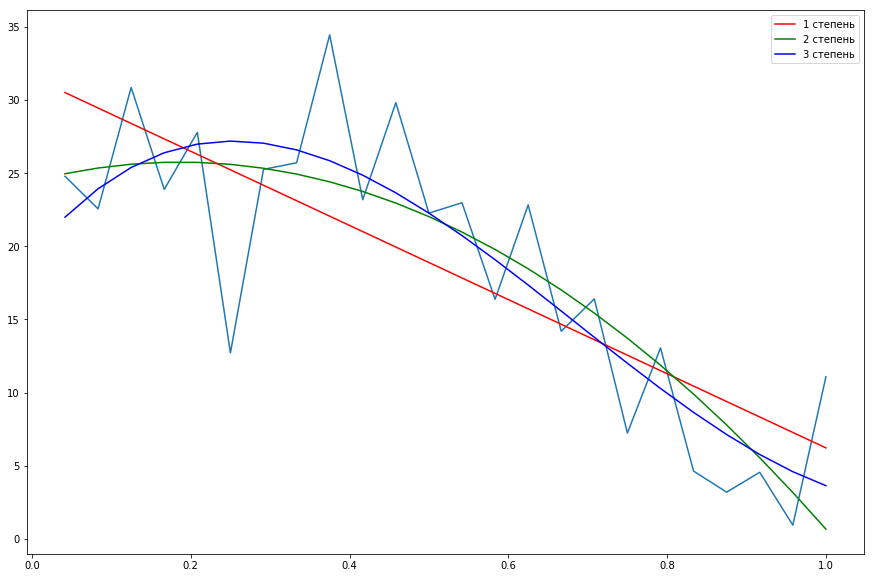

In [199]:
plt.figure(figsize = (15,10))
plt.plot(time, series)
plt.plot(time, B[0] + np.multiply(B[1], time), 'r', label = '1 степень') # строим его тренд
plt.plot(time, B2[0] + np.multiply(B2[1], time) + np.multiply(B2[2], np.square(time)), 'g', label = '2 степень') # строим его тренд
plt.plot(time, B3[0] + np.multiply(B3[1], time) + np.multiply(B3[2], np.square(time)) + np.multiply(B3[3], np.power(time,3)), 'b', label = '3 степень') # строим его тренд
plt.legend()
plt.show()

19) Теперь построим тренд методом сглаживания. Для этого
напишите следующую функцию:

In [208]:
def smooth(x, window_len):
    
    if window_len<3:
        return x

    s=np.r_[2*x[0]-x[window_len-1::-1], x, 2*x[-1]-x[-1:-window_len:-1]]
    w=np.ones(window_len, 'd')
    y=np.convolve(w/w.sum(), s, mode='same')
    
    return y[window_len:-window_len+1]

In [209]:
Smoothed_data3 = smooth(series_np, 3) 
Smoothed_data7 = smooth(series_np, 7) 
Smoothed_data11 = smooth(series_np, 11) 

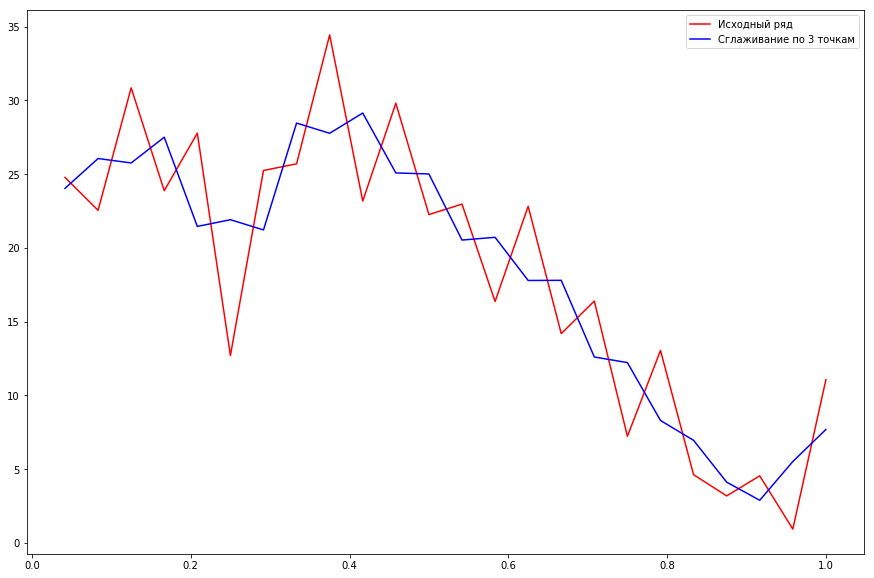

In [211]:
plt.figure(figsize = (15,10))
plt.plot(time, series, 'r', label = 'Исходный ряд')
plt.plot(time, Smoothed_data3, 'b', label = 'Сглаживание по 3 точкам')
plt.legend()
plt.show()

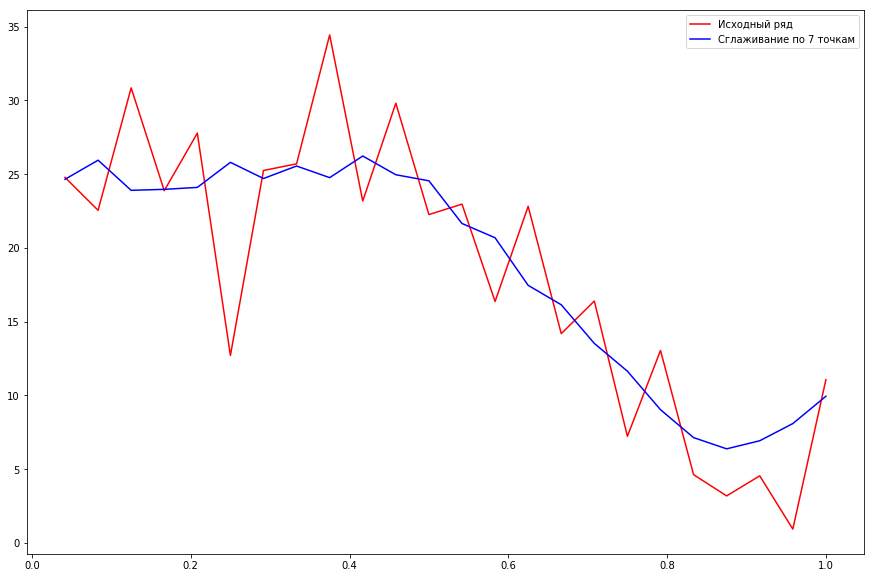

In [212]:
plt.figure(figsize = (15,10))
plt.plot(time, series, 'r', label = 'Исходный ряд')
plt.plot(time, Smoothed_data7, 'b', label = 'Сглаживание по 7 точкам')
plt.legend()
plt.show()

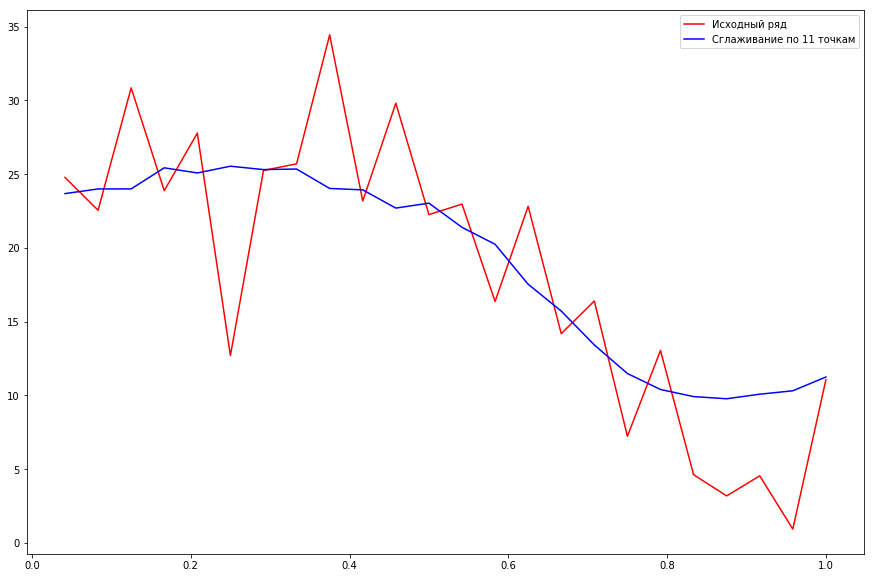

In [213]:
plt.figure(figsize = (15,10))
plt.plot(time, series, 'r', label = 'Исходный ряд')
plt.plot(time, Smoothed_data11, 'b', label = 'Сглаживание по 11 точкам')
plt.legend()
plt.show()

22) Постройте собственную функцию сглаживания по трем точкам,
на основе формул из лекции 4.


23) Постройте собственную функцию сглаживания по семи точкам,
на основе формул из лекции 4.

In [254]:
def my_smooth(x,window):
    
    half_window = int(window/2)

    res = [(np.sum(x[i-half_window:i])\
            + x[i] + np.sum(series[i+1:i+1+half_window]))\
            /window for i in range(len(x))
          ]
    
    return res

24) Сравните получившиеся результаты – тренды должны
получиться одинаковыми (отличия могут возникнуть только по краям
временного интервала).

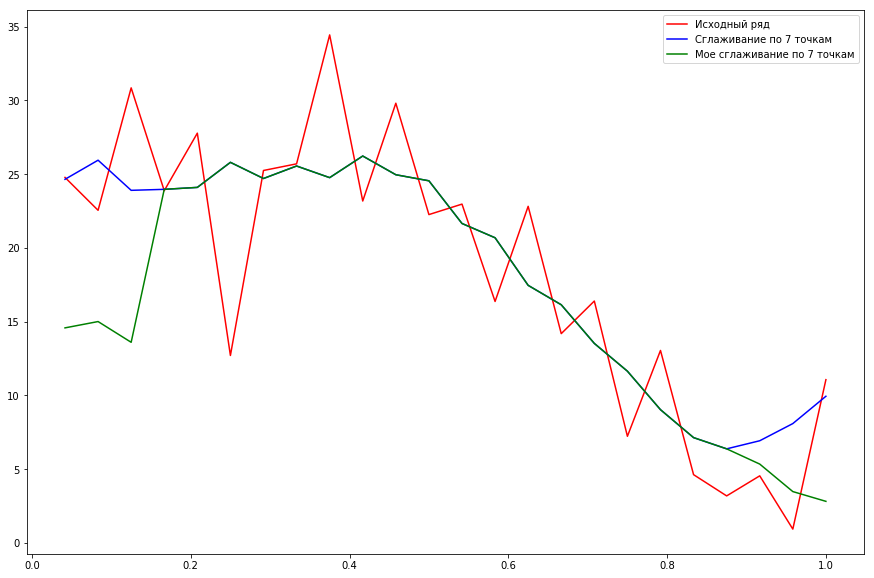

In [257]:
plt.figure(figsize = (15,10))
plt.plot(time, series, 'r', label = 'Исходный ряд')
plt.plot(time, Smoothed_data7, 'b', label = 'Сглаживание по 7 точкам')
plt.plot(time, my_smooth(series,7), 'g', label = 'Мое сглаживание по 7 точкам')
plt.legend()
plt.show()

25) Наконец, постройте тренд методом экспоненциального
сглаживания, самостоятельно подобрав его параметр (который
лежит в диапазоне от 0 до 1).

In [271]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt

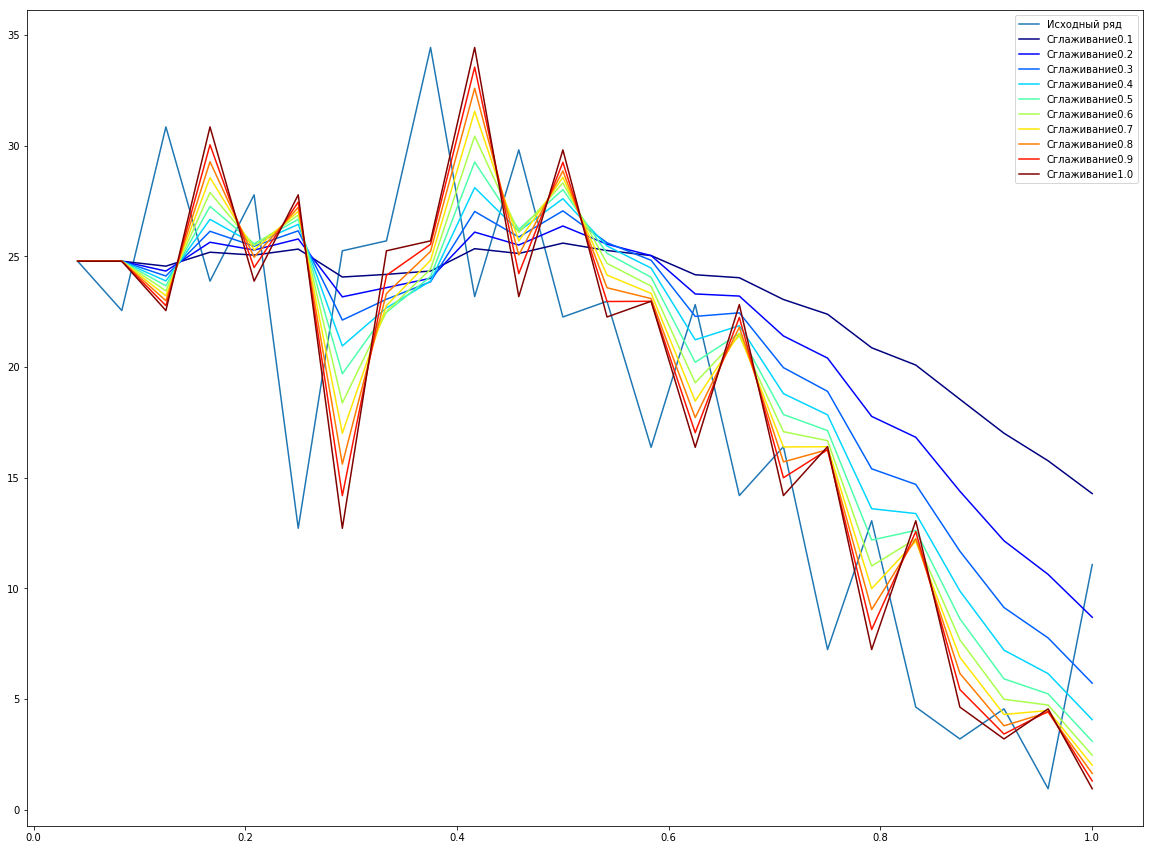

In [283]:
plt.figure(figsize = (20,15))    
plt.plot(time, series, label = 'Исходный ряд')

jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))

for i in range(0,10):
    smooth_lvl = (i+1)/10
    fit1 = SimpleExpSmoothing(series).fit(smoothing_level=smooth_lvl,optimized=False)        
    plt.plot(time, fit1.fittedvalues, color=next(colors), label = 'Сглаживание' + str(smooth_lvl))
plt.legend()
plt.show()

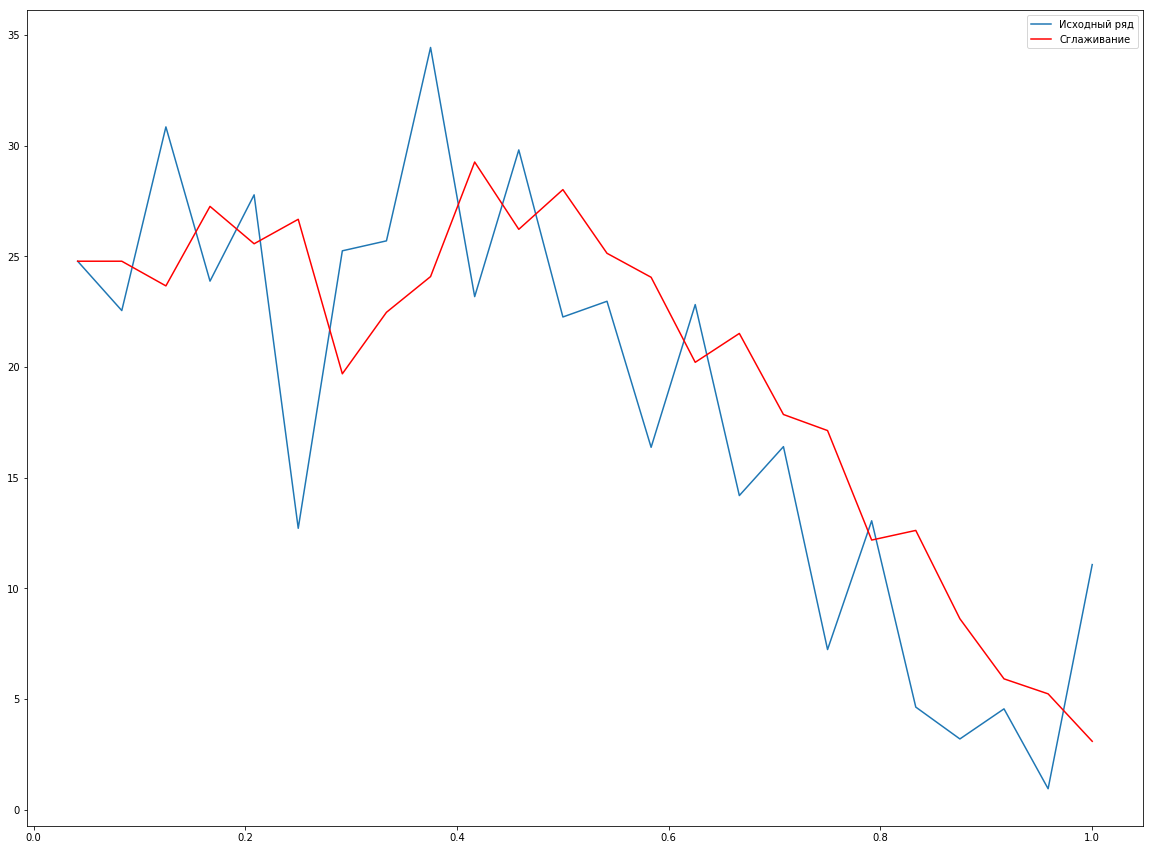

In [289]:
plt.figure(figsize = (20,15))    
plt.plot(time, series, label = 'Исходный ряд')
fit1 = SimpleExpSmoothing(series).fit(smoothing_level=0.5,optimized=False)        
plt.plot(time, fit1.fittedvalues, 'r', label = 'Сглаживание')
plt.legend()
plt.show()

In [298]:
def exp_smoothing(x,a):
    
    res = list()
    
    tau0 = (1-a)*x[0] + a*x[0]
    
    for i in range (len(x)):
        
        tau = (1-a)*tau0 + a*x[i]
        
        res.append(tau)
        
        tau0 = tau
    
    return res    

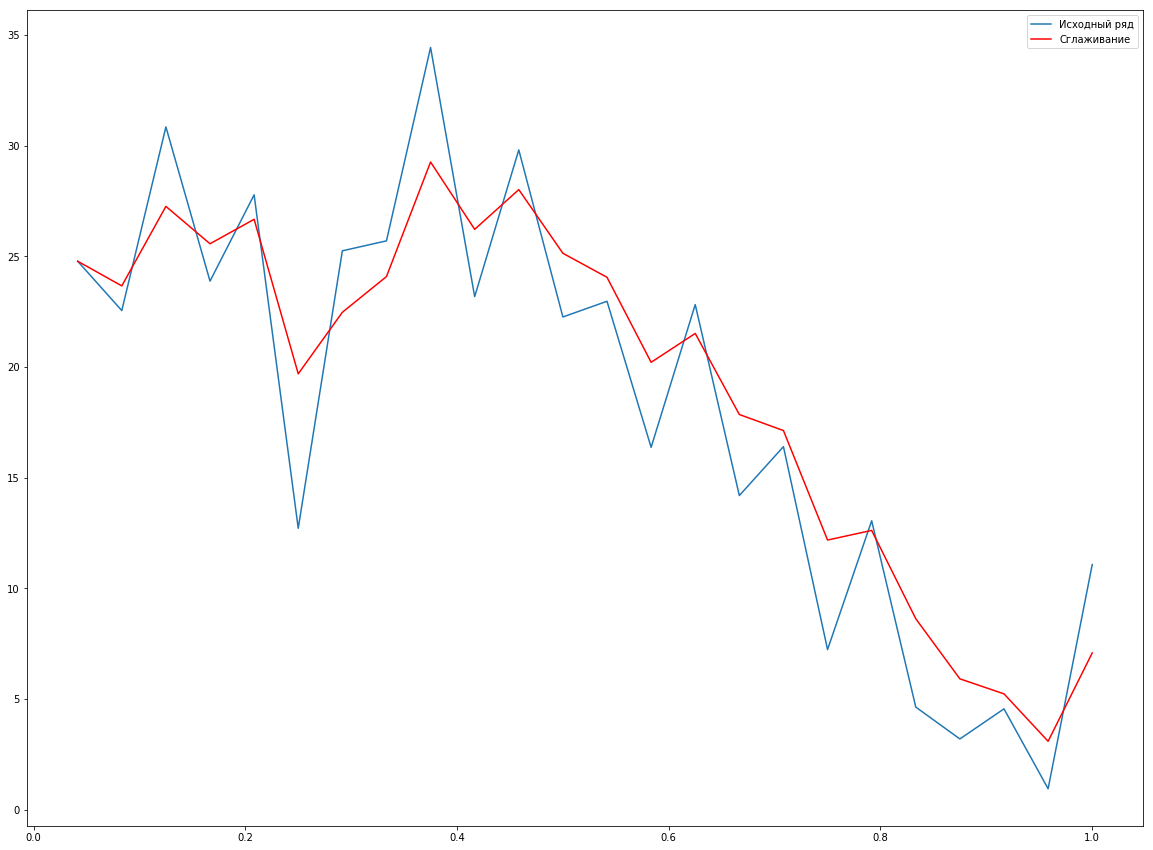

In [299]:
plt.figure(figsize = (20,15))    
plt.plot(time, series, label = 'Исходный ряд')
plt.plot(time, exp_smoothing(series,0.5), 'r', label = 'Сглаживание')
plt.legend()
plt.show()

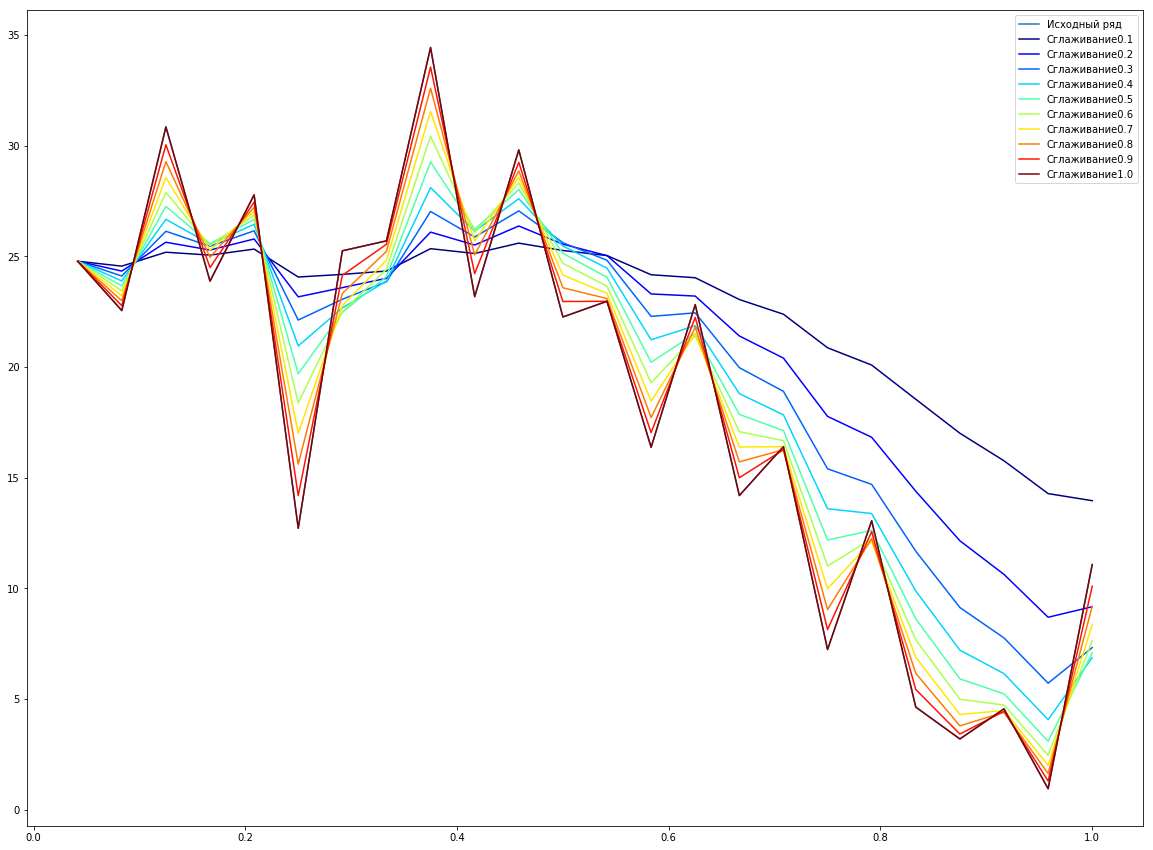

In [300]:
plt.figure(figsize = (20,15))    
plt.plot(time, series, label = 'Исходный ряд')

jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))

for i in range(0,10):
    smooth_lvl = (i+1)/10
    plt.plot(time, exp_smoothing(series,smooth_lvl), color=next(colors), label = 'Сглаживание' + str(smooth_lvl))
plt.legend()
plt.show()